# Song Lyrics Classifier: The "Early" Beatles vs The "Late" Beatles

In [1]:
import pandas as pd
import re
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.random.seed(42)

In [3]:
#The part is similar to classifier 1. We bring it the last two Beatles albums that were scraped from another source.
#Then we will merge it with the main source.
df = pd.read_csv('./Beatles_lyrics_Abbey_Road.csv')

In [4]:
Abbey_Road=df

In [5]:
Abbey_Road.head()

,song_title,lyrics
0,\r\nCome Together Lyrics,"[Intro: John Lennon]\r\nShoot me, shoot me, sh..."
1,\r\nSomething Lyrics,[Verse 1]\r\nSomething in the way she moves\r\...
2,\r\nMaxwell's Silver Hammer Lyrics,[Verse 1]\r\nJoan was quizzical; studied patap...
3,\r\nOh! Darling Lyrics,"[Verse 1]\r\nOh! Darling, please believe me\r\..."
4,\r\nOctopus's Garden Lyrics,[Chorus]\r\nI’d like to be under the sea\r\nIn...


In [6]:
df_1 = pd.read_csv('./Beatles_lyrics_Let_It_Be.csv')


In [7]:
Let_It_Be=df_1

In [8]:
Let_It_Be.head()

,song_title,lyrics
0,\r\nTwo of Us Lyrics,I Dig a Pygmy by Charles Hawtrey and the Deaf ...
1,\r\nDig a Pony Lyrics,"[Verse 1]\r\nI dig a pony\r\nWell, you can cel..."
2,\r\nAcross the Universe Lyrics,[Verse 1: John Lennon]\r\nWords are flowing ou...
3,\r\nI Me Mine Lyrics,"[Verse 1]\r\nAll through the day, I me mine\r\..."
4,\r\nDig It Lyrics,[Verse]\r\nLike a rolling stone\r\nLike a roll...


In [9]:
#We need to add album column because our classification will be based on that.
Abbey_Road['album']='Abbey_Road'

In [10]:
Abbey_Road.head()

,song_title,lyrics,album
0,\r\nCome Together Lyrics,"[Intro: John Lennon]\r\nShoot me, shoot me, sh...",Abbey_Road
1,\r\nSomething Lyrics,[Verse 1]\r\nSomething in the way she moves\r\...,Abbey_Road
2,\r\nMaxwell's Silver Hammer Lyrics,[Verse 1]\r\nJoan was quizzical; studied patap...,Abbey_Road
3,\r\nOh! Darling Lyrics,"[Verse 1]\r\nOh! Darling, please believe me\r\...",Abbey_Road
4,\r\nOctopus's Garden Lyrics,[Chorus]\r\nI’d like to be under the sea\r\nIn...,Abbey_Road


In [11]:
Let_It_Be['album']='Let_It_Be'

In [12]:
Let_It_Be.head()

,song_title,lyrics,album
0,\r\nTwo of Us Lyrics,I Dig a Pygmy by Charles Hawtrey and the Deaf ...,Let_It_Be
1,\r\nDig a Pony Lyrics,"[Verse 1]\r\nI dig a pony\r\nWell, you can cel...",Let_It_Be
2,\r\nAcross the Universe Lyrics,[Verse 1: John Lennon]\r\nWords are flowing ou...,Let_It_Be
3,\r\nI Me Mine Lyrics,"[Verse 1]\r\nAll through the day, I me mine\r\...",Let_It_Be
4,\r\nDig It Lyrics,[Verse]\r\nLike a rolling stone\r\nLike a roll...,Let_It_Be


In [13]:
last_two_albums = Abbey_Road.append(Let_It_Be,ignore_index=True)
last_two_albums



,song_title,lyrics,album
0,\r\nCome Together Lyrics,"[Intro: John Lennon]\r\nShoot me, shoot me, sh...",Abbey_Road
1,\r\nSomething Lyrics,[Verse 1]\r\nSomething in the way she moves\r\...,Abbey_Road
2,\r\nMaxwell's Silver Hammer Lyrics,[Verse 1]\r\nJoan was quizzical; studied patap...,Abbey_Road
3,\r\nOh! Darling Lyrics,"[Verse 1]\r\nOh! Darling, please believe me\r\...",Abbey_Road
4,\r\nOctopus's Garden Lyrics,[Chorus]\r\nI’d like to be under the sea\r\nIn...,Abbey_Road
5,\r\nI Want You (She's So Heavy) Lyrics,[Verse]\r\nI want you\r\nI want you so bad\r\n...,Abbey_Road
6,\r\nHere Comes the Sun Lyrics,[Intro]\r\nHere comes the sun (doo doo doo doo...,Abbey_Road
7,\r\nBecause Lyrics,[Verse 1]\r\nBecause the world is round it tur...,Abbey_Road
8,\r\nYou Never Give Me Your Money Lyrics,[Verse 1]\r\nYou never give me your money\r\nY...,Abbey_Road
9,\r\nSun King Lyrics,"[Chorus]\r\nOooh, here comes the sun king\r\nH...",Abbey_Road


In [14]:
last_two_albums['period'] ='late'

In [15]:
#Rows 17 and 30 are not songs and row 22 represents a song that hardly has any lyrics. We will remove them.
last_two_albums.drop([17, 22, 30], inplace=True)

In [16]:
last_two_albums=last_two_albums.reset_index(drop=True)
last_two_albums

,song_title,lyrics,album,period
0,\r\nCome Together Lyrics,"[Intro: John Lennon]\r\nShoot me, shoot me, sh...",Abbey_Road,late
1,\r\nSomething Lyrics,[Verse 1]\r\nSomething in the way she moves\r\...,Abbey_Road,late
2,\r\nMaxwell's Silver Hammer Lyrics,[Verse 1]\r\nJoan was quizzical; studied patap...,Abbey_Road,late
3,\r\nOh! Darling Lyrics,"[Verse 1]\r\nOh! Darling, please believe me\r\...",Abbey_Road,late
4,\r\nOctopus's Garden Lyrics,[Chorus]\r\nI’d like to be under the sea\r\nIn...,Abbey_Road,late
5,\r\nI Want You (She's So Heavy) Lyrics,[Verse]\r\nI want you\r\nI want you so bad\r\n...,Abbey_Road,late
6,\r\nHere Comes the Sun Lyrics,[Intro]\r\nHere comes the sun (doo doo doo doo...,Abbey_Road,late
7,\r\nBecause Lyrics,[Verse 1]\r\nBecause the world is round it tur...,Abbey_Road,late
8,\r\nYou Never Give Me Your Money Lyrics,[Verse 1]\r\nYou never give me your money\r\nY...,Abbey_Road,late
9,\r\nSun King Lyrics,"[Chorus]\r\nOooh, here comes the sun king\r\nH...",Abbey_Road,late


In [17]:
last_two_albums.song_title = last_two_albums.song_title.str.replace('Lyrics','').str.replace('\r\n','')

In [18]:
last_two_albums.head()

,song_title,lyrics,album,period
0,Come Together,"[Intro: John Lennon]\r\nShoot me, shoot me, sh...",Abbey_Road,late
1,Something,[Verse 1]\r\nSomething in the way she moves\r\...,Abbey_Road,late
2,Maxwell's Silver Hammer,[Verse 1]\r\nJoan was quizzical; studied patap...,Abbey_Road,late
3,Oh! Darling,"[Verse 1]\r\nOh! Darling, please believe me\r\...",Abbey_Road,late
4,Octopus's Garden,[Chorus]\r\nI’d like to be under the sea\r\nIn...,Abbey_Road,late


In [19]:
last_two_albums=last_two_albums[['album', 'song_title', 'period', 'lyrics']]
last_two_albums.head()

,album,song_title,period,lyrics
0,Abbey_Road,Come Together,late,"[Intro: John Lennon]\r\nShoot me, shoot me, sh..."
1,Abbey_Road,Something,late,[Verse 1]\r\nSomething in the way she moves\r\...
2,Abbey_Road,Maxwell's Silver Hammer,late,[Verse 1]\r\nJoan was quizzical; studied patap...
3,Abbey_Road,Oh! Darling,late,"[Verse 1]\r\nOh! Darling, please believe me\r\..."
4,Abbey_Road,Octopus's Garden,late,[Chorus]\r\nI’d like to be under the sea\r\nIn...


In [20]:
last_two_albums['lyrics'].iloc[0]

'[Intro: John Lennon]\r\nShoot me, shoot me, shoot me, shoot me\r\n\r\n[Verse 1: John Lennon]\r\nHere come old flat-top, he come groovin\' up slowly\r\nHe got ju-ju eyeballs, he one holy roller\r\nHe got hair down to his knee\r\nGot to be a joker, he just do what he please\r\n\r\n[Interlude: John Lennon]\r\nShoot me, shoot me, shoot me, shoot me\r\n\r\n[Verse 2: John Lennon]\r\nHe wear no shoeshine, he got toe-jam football\r\nHe got monkey finger, he shoot Coca-Cola\r\nHe say, "I know you, you know me"\r\nOne thing I can tell you is you got to be free\r\n\r\n[Chorus: John Lennon]\r\nCome together, right now\r\nOver me\r\n\r\n[Verse 3: John Lennon]\r\nHe bag production, he got walrus gumboot\r\nHe got Ono sideboard, he one spinal cracker\r\nHe got feet down below his knee\r\nHold you in his armchair, you can feel his disease\r\n\r\n[Chorus: John Lennon]\r\nCome together, right now\r\nOver me\r\n\r\n[Interlude: John Lennon]\r\nShoot me, shoot me\r\nRight!\r\n\r\n[Guitar Solo]\r\n\r\n[Ver

In [21]:
last_two_albums.lyrics=last_two_albums.lyrics.str.replace('\r\n',' ')


In [22]:
last_two_albums['lyrics'].iloc[0]

'[Intro: John Lennon] Shoot me, shoot me, shoot me, shoot me  [Verse 1: John Lennon] Here come old flat-top, he come groovin\' up slowly He got ju-ju eyeballs, he one holy roller He got hair down to his knee Got to be a joker, he just do what he please  [Interlude: John Lennon] Shoot me, shoot me, shoot me, shoot me  [Verse 2: John Lennon] He wear no shoeshine, he got toe-jam football He got monkey finger, he shoot Coca-Cola He say, "I know you, you know me" One thing I can tell you is you got to be free  [Chorus: John Lennon] Come together, right now Over me  [Verse 3: John Lennon] He bag production, he got walrus gumboot He got Ono sideboard, he one spinal cracker He got feet down below his knee Hold you in his armchair, you can feel his disease  [Chorus: John Lennon] Come together, right now Over me  [Interlude: John Lennon] Shoot me, shoot me Right!  [Guitar Solo]  [Verse 4: John Lennon] He roller-coaster, he got early warnin\' He got muddy water, he one mojo filter He say, "One an

In [23]:
last_two_albums.lyrics=last_two_albums.lyrics.str.replace('\[(.*?)\]',' ')

In [24]:
last_two_albums['lyrics'].iloc[0]

'  Shoot me, shoot me, shoot me, shoot me    Here come old flat-top, he come groovin\' up slowly He got ju-ju eyeballs, he one holy roller He got hair down to his knee Got to be a joker, he just do what he please    Shoot me, shoot me, shoot me, shoot me    He wear no shoeshine, he got toe-jam football He got monkey finger, he shoot Coca-Cola He say, "I know you, you know me" One thing I can tell you is you got to be free    Come together, right now Over me    He bag production, he got walrus gumboot He got Ono sideboard, he one spinal cracker He got feet down below his knee Hold you in his armchair, you can feel his disease    Come together, right now Over me    Shoot me, shoot me Right!       He roller-coaster, he got early warnin\' He got muddy water, he one mojo filter He say, "One and one and one is three" Got to be good-lookin\' \'cause he\'s so hard to see    Come together, right now Over me    Shoot me, shoot me, shoot me, shoot me Ugh!    Come together, yeah Come together, yea

In [25]:
df_main = pd.read_csv('./Beatles_lyrics.csv')

In [26]:
df_main.head()

,album,song_title,lyrics
0,"""Please Please Me""","""I Saw Her Standing There""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
1,"""Please Please Me""","""Misery""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
2,"""Please Please Me""","""Anna (Go To Him)""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
3,"""Please Please Me""","""Chains""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
4,"""Please Please Me""","""Boys""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."


In [27]:
df_main.tail()

,album,song_title,lyrics
154,"""Yellow Submarine""","""Hey Bulldog""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
155,"""Yellow Submarine""","""It's All Too Much""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
156,"""Magical Mystery Tour""","""All You Need Is Love""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
157,"""Yellow Submarine""","""Pepperland""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
158,"""Yellow Submarine""","""Medley: Sea Of Time & Sea Of Holes""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."


In [28]:
df_main.song_title=df_main.song_title.str.replace('"','')

In [29]:
df_main.album=df_main.album.str.replace('"','')

In [30]:
df_main.head()

,album,song_title,lyrics
0,Please Please Me,I Saw Her Standing There,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
1,Please Please Me,Misery,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
2,Please Please Me,Anna (Go To Him),"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
3,Please Please Me,Chains,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
4,Please Please Me,Boys,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."


In [31]:
df_main['period'] ='early'

In [32]:
df_main.head()

,album,song_title,lyrics,period
0,Please Please Me,I Saw Her Standing There,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early
1,Please Please Me,Misery,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early
2,Please Please Me,Anna (Go To Him),"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early
3,Please Please Me,Chains,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early
4,Please Please Me,Boys,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early


In [33]:
#let's define our periods here. The first 7 albums will be considered "early" Beatles and the rest will be considered
#"late" Beatles.
song_periods = {'Yellow Submarine' : "late", 'Magical Mystery Tour': "late", 
                'The Beatles (The White Album)': "late", "Sgt. Pepper's Lonely Hearts Club Band": "late",
               'Please Please Me': 'early', 'With The Beatles': 'early', "A Hard Day's Night": 'early',
               'Beatles For Sale': 'early', 'Help!': 'early', 'Revolver': 'early', 'Rubber Soul': 'early'}

df_main['period'] = df_main['album'].map(song_periods)


In [34]:
df_main.tail(80)

,album,song_title,lyrics,period
79,Rubber Soul,In My Life,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early
80,Rubber Soul,Wait,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early
81,Rubber Soul,If I Needed Someone,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early
82,Rubber Soul,Run For Your Life,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early
83,Revolver,Taxman,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early
84,Revolver,Eleanor Rigby,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early
85,Revolver,I'm Only Sleeping,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early
86,Revolver,Love You To,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early
87,Revolver,"Here, There And Everywhere","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early
88,Revolver,Yellow Submarine,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",early


In [35]:
df_main=df_main[['album', 'song_title', 'period', 'lyrics']]
df_main.head()

,album,song_title,period,lyrics
0,Please Please Me,I Saw Her Standing There,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
1,Please Please Me,Misery,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
2,Please Please Me,Anna (Go To Him),early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
3,Please Please Me,Chains,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
4,Please Please Me,Boys,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."


In [36]:
df_main =df_main.append(last_two_albums,ignore_index=True)

In [37]:
df_main=df_main.reset_index(drop=True)
df_main.tail()

,album,song_title,period,lyrics
182,Let_It_Be,I've Got a Feeling,late,"I've got a feeling, a feeling deep inside Oh..."
183,Let_It_Be,One After 909,late,My baby says she's travelling on the one aft...
184,Let_It_Be,The Long and Winding Road,late,The long and winding road that leads to your...
185,Let_It_Be,For You Blue,late,(Queen says no to pot-smoking FBI members) ...
186,Let_It_Be,Get Back (Let It Be version),late,Rosetta... Sweet Loretta Fart she thought she ...


In [38]:
df_main.song_title = df_main.song_title.str.strip()

In [39]:
df_main['song_title_allcap'] = df_main['song_title']

In [40]:
df_main.song_title_allcap=df_main.song_title_allcap.str.upper()

In [41]:
df_main.song_title_allcap=df_main.song_title_allcap.str.replace(',','')

In [42]:
df_main.head()

,album,song_title,period,lyrics,song_title_allcap
0,Please Please Me,I Saw Her Standing There,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",I SAW HER STANDING THERE
1,Please Please Me,Misery,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",MISERY
2,Please Please Me,Anna (Go To Him),early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",ANNA (GO TO HIM)
3,Please Please Me,Chains,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",CHAINS
4,Please Please Me,Boys,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",BOYS


In [43]:
df_authors = pd.read_csv('./Beatles_songs_authors.csv')

In [44]:
df_authors.tail(50)

,author,title_1
261,LennonMcCartney,"""Thank You Girl"""
262,McCartney,"""That Means a Lot"""
263,Jerry AllisonBuddy HollyNorman Petty,"""That'll Be the Day"""
264,Arthur Crudup,"""That’s All Right (Mama)"""
265,LennonMcCartney,"""There's a Place"""
266,McCartney,"""Things We Said Today"""
267,Harrison,"""Think for Yourself"""
268,Lennon,"""This Boy"""
269,Jerry Leiber and Mike Stoller,"""Three Cool Cats"""
270,Lennon,"""Ticket to Ride"""


In [45]:
df_authors.title_1=df_authors.title_1.str.replace('"','')

In [46]:
df_authors.head()

,author,title_1
0,John LennonPaul McCartneyGeorge HarrisonRingo ...,12-Bar Original
1,Lennon,Across the Universe
2,Johnny RussellVoni Morrison,Act Naturally
3,Jack YellenMilton Ager,Ain't She Sweet
4,Lennon,All I've Got to Do


In [47]:
#df_authors= df_authors.rename({'title_1': 'song_title'}, axis=1)


In [48]:
df_authors.title_1 = df_authors.title_1.str.strip()

In [49]:
df_authors['song_title_allcap'] = df_authors['title_1']

In [50]:
df_authors.head()

,author,title_1,song_title_allcap
0,John LennonPaul McCartneyGeorge HarrisonRingo ...,12-Bar Original,12-Bar Original
1,Lennon,Across the Universe,Across the Universe
2,Johnny RussellVoni Morrison,Act Naturally,Act Naturally
3,Jack YellenMilton Ager,Ain't She Sweet,Ain't She Sweet
4,Lennon,All I've Got to Do,All I've Got to Do


In [51]:
df_authors.song_title_allcap=df_authors.song_title_allcap.str.upper()

In [52]:
df_authors.song_title_allcap=df_authors.song_title_allcap.str.replace(',','')

In [53]:
df_authors.tail(100)

,author,title_1,song_title_allcap
211,Harrison,Piggies,PIGGIES
212,Georgia DobbinsWilliam GarrettBrian HollandRob...,Please Mr. Postman,PLEASE MR. POSTMAN
213,Lennon,Please Please Me,PLEASE PLEASE ME
214,Lennon,Polythene Pam,POLYTHENE PAM
215,McCartney(with Lennon),P.S. I Love You,P.S. I LOVE YOU
216,Lennon,Rain,RAIN
217,Lennon,Real Love,REAL LOVE
218,Lennon,Revolution,REVOLUTION
219,Lennon,Revolution 1,REVOLUTION 1
220,Lennon(with Ono and Harrison),Revolution 9,REVOLUTION 9


In [54]:
#df_authors.song_title = df_authors.song_title.str.lstrip()

In [55]:
df_main_1 = pd.merge(df_main, df_authors, on = 'song_title_allcap', how = 'left')

In [56]:
df_main_1.head(70)

,album,song_title,period,lyrics,song_title_allcap,author,title_1
0,Please Please Me,I Saw Her Standing There,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",I SAW HER STANDING THERE,McCartney(with Lennon),I Saw Her Standing There
1,Please Please Me,Misery,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",MISERY,Lennon(with McCartney),Misery
2,Please Please Me,Anna (Go To Him),early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",ANNA (GO TO HIM),Arthur Alexander,Anna (Go to Him)
3,Please Please Me,Chains,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",CHAINS,Gerry GoffinCarole King,Chains
4,Please Please Me,Boys,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",BOYS,Luther DixonWes Farrell,Boys
5,Please Please Me,Ask Me Why,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",ASK ME WHY,Lennon(with McCartney),Ask Me Why
6,Please Please Me,Please Please Me,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",PLEASE PLEASE ME,Lennon,Please Please Me
7,Please Please Me,Love Me Do,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",LOVE ME DO,McCartney(with Lennon),Love Me Do
8,Please Please Me,P.S. I Love You,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",P.S. I LOVE YOU,McCartney(with Lennon),P.S. I Love You
9,Please Please Me,Baby It's You,early,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",BABY IT'S YOU,Burt BacharachHal DavidLuther Dixon,Baby It's You


In [57]:
df_main_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 7 columns):
album                187 non-null object
song_title           187 non-null object
period               187 non-null object
lyrics               187 non-null object
song_title_allcap    187 non-null object
author               179 non-null object
title_1              179 non-null object
dtypes: object(7)
memory usage: 11.7+ KB


In [58]:
#Let's assign values manually in the 8 rows with a missing author .
df_main_1.author.iloc[[20,23,47,157,158]] = ('cover')
df_main_1.author.iloc[[105,186]] = ('McCartney')
df_main_1.author.iloc[[148]] = ('Lennon')
#df_main_1=df_main_1.iloc[[20,23,47,157,158]]['author'] = 'cover'
#df_main_1=df_main_1.iloc[[105,186]]['author'] = 'McCartney'
#df_main_1=df_main_1.iloc[[148]]['author'] = 'Lennon'

In [59]:
df_main_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 7 columns):
album                187 non-null object
song_title           187 non-null object
period               187 non-null object
lyrics               187 non-null object
song_title_allcap    187 non-null object
author               187 non-null object
title_1              179 non-null object
dtypes: object(7)
memory usage: 11.7+ KB


In [60]:
df_main_1['author'].iloc[105]

'McCartney'

In [61]:
df_main_1.tail(50)

,album,song_title,period,lyrics,song_title_allcap,author,title_1
137,The Beatles (The White Album),Julia,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",JULIA,Lennon,Julia
138,The Beatles (The White Album),Birthday,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",BIRTHDAY,LennonMcCartney,Birthday
139,The Beatles (The White Album),Yer Blues,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",YER BLUES,Lennon,Yer Blues
140,The Beatles (The White Album),Mother Nature's Son,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",MOTHER NATURE'S SON,McCartney,Mother Nature's Son
141,The Beatles (The White Album),Everybody's Got Something To Hide Except Me An...,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",EVERYBODY'S GOT SOMETHING TO HIDE EXCEPT ME AN...,Lennon,Everybody's Got Something to Hide Except Me an...
142,The Beatles (The White Album),Sexy Sadie,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",SEXY SADIE,Lennon,Sexy Sadie
143,The Beatles (The White Album),Helter Skelter,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",HELTER SKELTER,McCartney,Helter Skelter
144,The Beatles (The White Album),"Long, Long, Long",late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",LONG LONG LONG,Harrison,"Long, Long, Long"
145,The Beatles (The White Album),Revolution 1,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",REVOLUTION 1,Lennon,Revolution 1
146,The Beatles (The White Album),Honey Pie,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",HONEY PIE,McCartney,Honey Pie


In [62]:
#we will cross validate the song ownership against the Beatles Bible and assign new values, if necessary.
df_main_authors_adj=df_main_1
df_main_authors_adj.author.iloc[[5,12,14,35,41,55,72,76,79,82,91,93,181]] = ('Lennon')
df_main_authors_adj.author.iloc[[8,22,32,65,75,84,88,90,100,110,133]] = ('McCartney')

In [63]:
df_main_authors_adj.author.unique()

array(['McCartney(with Lennon)', 'Lennon(with McCartney)',
       'Arthur Alexander ', 'Gerry GoffinCarole King ',
       'Luther DixonWes Farrell ', 'Lennon', 'McCartney',
       'Burt BacharachHal DavidLuther Dixon ', 'Bobby ScottRic Marlow ',
       'Phil MedleyBert Berns ', 'Harrison', 'LennonMcCartney',
       'Meredith Willson ', 'cover', 'Chuck Berry ',
       'Drapkin (a.k.a. Ricky Dee) ', 'Berry GordyJanie Bradford ',
       'Roy Lee Johnson ', 'Buddy Holly ', 'Carl Perkins ',
       'Johnny RussellVoni Morrison ', 'Larry Williams ',
       'LennonMcCartneyHarrisonStarr', 'Starr[d]',
       'Lennon(with Ono and Harrison)', 'McCartney[36]', 'McCartney[29]',
       'Lennon[25]', 'McCartney[39]', 'Lennon[37]'], dtype=object)

In [64]:
df_main_authors_adj.author=df_main_authors_adj.author.str.replace(r'\d+','')

In [65]:
df_main_authors_adj.author.unique()

array(['McCartney(with Lennon)', 'Lennon(with McCartney)',
       'Arthur Alexander ', 'Gerry GoffinCarole King ',
       'Luther DixonWes Farrell ', 'Lennon', 'McCartney',
       'Burt BacharachHal DavidLuther Dixon ', 'Bobby ScottRic Marlow ',
       'Phil MedleyBert Berns ', 'Harrison', 'LennonMcCartney',
       'Meredith Willson ', 'cover', 'Chuck Berry ',
       'Drapkin (a.k.a. Ricky Dee) ', 'Berry GordyJanie Bradford ',
       'Roy Lee Johnson ', 'Buddy Holly ', 'Carl Perkins ',
       'Johnny RussellVoni Morrison ', 'Larry Williams ',
       'LennonMcCartneyHarrisonStarr', 'Starr[d]',
       'Lennon(with Ono and Harrison)', 'McCartney[]', 'Lennon[]'],
      dtype=object)

In [66]:
df_main_authors_adj.author=df_main_authors_adj.author.str.replace(r'\[]','')

In [67]:
df_main_authors_adj.author.unique()

array(['McCartney(with Lennon)', 'Lennon(with McCartney)',
       'Arthur Alexander ', 'Gerry GoffinCarole King ',
       'Luther DixonWes Farrell ', 'Lennon', 'McCartney',
       'Burt BacharachHal DavidLuther Dixon ', 'Bobby ScottRic Marlow ',
       'Phil MedleyBert Berns ', 'Harrison', 'LennonMcCartney',
       'Meredith Willson ', 'cover', 'Chuck Berry ',
       'Drapkin (a.k.a. Ricky Dee) ', 'Berry GordyJanie Bradford ',
       'Roy Lee Johnson ', 'Buddy Holly ', 'Carl Perkins ',
       'Johnny RussellVoni Morrison ', 'Larry Williams ',
       'LennonMcCartneyHarrisonStarr', 'Starr[d]',
       'Lennon(with Ono and Harrison)'], dtype=object)

In [68]:
df_main_authors_adj.tail(80)

,album,song_title,period,lyrics,song_title_allcap,author,title_1
107,Sgt. Pepper's Lonely Hearts Club Band,"Good Morning, Good Morning",late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",GOOD MORNING GOOD MORNING,Lennon,Good Morning Good Morning
108,Sgt. Pepper's Lonely Hearts Club Band,Sgt. Pepper's Lonely Hearts Club Band (Reprise),late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",SGT. PEPPER'S LONELY HEARTS CLUB BAND (REPRISE),McCartney,Sgt. Pepper's Lonely Hearts Club Band (Reprise)
109,Sgt. Pepper's Lonely Hearts Club Band,A Day In The Life,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",A DAY IN THE LIFE,LennonMcCartney,A Day in the Life
110,Magical Mystery Tour,Magical Mystery Tour,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",MAGICAL MYSTERY TOUR,McCartney,Magical Mystery Tour
111,Magical Mystery Tour,The Fool On The Hill,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",THE FOOL ON THE HILL,McCartney,The Fool on the Hill
112,Magical Mystery Tour,Flying,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",FLYING,LennonMcCartneyHarrisonStarr,Flying
113,Magical Mystery Tour,Blue Jay Way,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",BLUE JAY WAY,Harrison,Blue Jay Way
114,Magical Mystery Tour,Your Mother Should Know,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",YOUR MOTHER SHOULD KNOW,McCartney,Your Mother Should Know
115,Magical Mystery Tour,I Am The Walrus,late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",I AM THE WALRUS,Lennon,I Am the Walrus
116,Magical Mystery Tour,"Hello, Goodbye",late,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",HELLO GOODBYE,McCartney,"Hello, Goodbye"


In [69]:
#We will only include songs written by the band members and exclude all covers.
df_b=df_main_authors_adj.loc[df_main_authors_adj['author'].isin(['Lennon', 'McCartney', 'McCartney(with Lennon)','Lennon(with McCartney)',
                                                                'LennonMcCartney','Harrison'])]

#df.loc[df['column_name'].isin(some_values)]
df_lm=df_main_authors_adj.loc[df_main_authors_adj['author'].isin(['Lennon', 'McCartney'])]
df_lm.info()
                                                            

In [70]:
df_b.author.value_counts()

Lennon                    63
McCartney                 58
Harrison                  20
McCartney(with Lennon)     9
LennonMcCartney            8
Lennon(with McCartney)     3
Name: author, dtype: int64

In [71]:
df_b['lyrics'].iloc[5]

'[<div id="fb-root"></div>, <div>\r\n<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->\r\r\nAs I write this letter<br/>\r\nSend my love to you<br/>\r\nRemember that I\'ll always<br/>\r\nBe in love with you<br/>\r\n<br/>\r\nTreasure these few words till we\'re together<br/>\r\nKeep all my love forever<br/>\r\nP.S. I love you<br/>\r\nYou, you, you<br/>\r\n<br/>\r\nI\'ll be coming home again to you, love<br/>\r\nAnd till the day I do, love<br/>\r\nP.S. I love you<br/>\r\nYou, you, you<br/>\r\n<br/>\r\nAs I write this letter<br/>\r\nSend my love to you<br/>\r\nRemember that I\'ll always<br/>\r\nBe in love with you<br/>\r\n<br/>\r\nTreasure these few words till we\'re together<br/>\r\nKeep all my love forever<br/>\r\nP.S. I love you<br/>\r\nYou, you, you<br/>\r\n<br/>\r\nAs I write this letter (Oh)<br/>\r\nSend my love to you (You know I want you to)<br/>\r\nRemember that I\'ll always (Yeah)<br/>\r\nBe in lo

In [72]:
df_b.lyrics=df_b.lyrics.str.replace('<div id="fb-root"></div>, <div>\r\n<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->\r\r','')

C:\Users\klokl\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [73]:
df_b['lyrics'].iloc[5]

"[\nAs I write this letter<br/>\r\nSend my love to you<br/>\r\nRemember that I'll always<br/>\r\nBe in love with you<br/>\r\n<br/>\r\nTreasure these few words till we're together<br/>\r\nKeep all my love forever<br/>\r\nP.S. I love you<br/>\r\nYou, you, you<br/>\r\n<br/>\r\nI'll be coming home again to you, love<br/>\r\nAnd till the day I do, love<br/>\r\nP.S. I love you<br/>\r\nYou, you, you<br/>\r\n<br/>\r\nAs I write this letter<br/>\r\nSend my love to you<br/>\r\nRemember that I'll always<br/>\r\nBe in love with you<br/>\r\n<br/>\r\nTreasure these few words till we're together<br/>\r\nKeep all my love forever<br/>\r\nP.S. I love you<br/>\r\nYou, you, you<br/>\r\n<br/>\r\nAs I write this letter (Oh)<br/>\r\nSend my love to you (You know I want you to)<br/>\r\nRemember that I'll always (Yeah)<br/>\r\nBe in love with you<br/>\r\n<br/>\r\nI'll be coming home again to you, love<br/>\r\nAnd till the day I do, love<br/>\r\nP.S. I love you<br/>\r\nYou, you, you<br/>\r\nYou, you, you<br/>\r

In [74]:
#df_lm.lyrics=df_lm.lyrics.str.replace('r\n', ',')

In [75]:
#df_lm['lyrics'].iloc[5]

In [76]:
df_b.lyrics=df_b.lyrics.str.replace('<br/>',',')

In [77]:
df_b['lyrics'].iloc[5]

"[\nAs I write this letter,\r\nSend my love to you,\r\nRemember that I'll always,\r\nBe in love with you,\r\n,\r\nTreasure these few words till we're together,\r\nKeep all my love forever,\r\nP.S. I love you,\r\nYou, you, you,\r\n,\r\nI'll be coming home again to you, love,\r\nAnd till the day I do, love,\r\nP.S. I love you,\r\nYou, you, you,\r\n,\r\nAs I write this letter,\r\nSend my love to you,\r\nRemember that I'll always,\r\nBe in love with you,\r\n,\r\nTreasure these few words till we're together,\r\nKeep all my love forever,\r\nP.S. I love you,\r\nYou, you, you,\r\n,\r\nAs I write this letter (Oh),\r\nSend my love to you (You know I want you to),\r\nRemember that I'll always (Yeah),\r\nBe in love with you,\r\n,\r\nI'll be coming home again to you, love,\r\nAnd till the day I do, love,\r\nP.S. I love you,\r\nYou, you, you,\r\nYou, you, you,\r\nI love you\r\n</div>]"

In [78]:
df_b.lyrics=df_b.lyrics.str.replace('\r\n',',')

In [79]:
df_b['lyrics'].iloc[5]

"[\nAs I write this letter,,Send my love to you,,Remember that I'll always,,Be in love with you,,,,Treasure these few words till we're together,,Keep all my love forever,,P.S. I love you,,You, you, you,,,,I'll be coming home again to you, love,,And till the day I do, love,,P.S. I love you,,You, you, you,,,,As I write this letter,,Send my love to you,,Remember that I'll always,,Be in love with you,,,,Treasure these few words till we're together,,Keep all my love forever,,P.S. I love you,,You, you, you,,,,As I write this letter (Oh),,Send my love to you (You know I want you to),,Remember that I'll always (Yeah),,Be in love with you,,,,I'll be coming home again to you, love,,And till the day I do, love,,P.S. I love you,,You, you, you,,You, you, you,,I love you,</div>]"

In [80]:
df_b.lyrics=df_b.lyrics.str.replace('\n',',').str.replace('</div>','')
df_b['lyrics'].iloc[5]

"[,As I write this letter,,Send my love to you,,Remember that I'll always,,Be in love with you,,,,Treasure these few words till we're together,,Keep all my love forever,,P.S. I love you,,You, you, you,,,,I'll be coming home again to you, love,,And till the day I do, love,,P.S. I love you,,You, you, you,,,,As I write this letter,,Send my love to you,,Remember that I'll always,,Be in love with you,,,,Treasure these few words till we're together,,Keep all my love forever,,P.S. I love you,,You, you, you,,,,As I write this letter (Oh),,Send my love to you (You know I want you to),,Remember that I'll always (Yeah),,Be in love with you,,,,I'll be coming home again to you, love,,And till the day I do, love,,P.S. I love you,,You, you, you,,You, you, you,,I love you,]"

In [81]:
df_b.duplicated(subset='song_title', keep='first')

0      False
1      False
5      False
6      False
7      False
8      False
10     False
12     False
14     False
15     False
16     False
17     False
18     False
22     False
24     False
26     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
       ...  
154    False
155    False
156     True
159    False
160    False
161    False
162    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
Length: 161, dtype: bool

In [82]:
df_b=df_b.drop_duplicates(subset=['song_title'], keep='first')

In [83]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 186
Data columns (total 7 columns):
album                159 non-null object
song_title           159 non-null object
period               159 non-null object
lyrics               159 non-null object
song_title_allcap    159 non-null object
author               159 non-null object
title_1              156 non-null object
dtypes: object(7)
memory usage: 9.9+ KB


In [84]:
df_b.author.value_counts()

Lennon                    62
McCartney                 58
Harrison                  20
LennonMcCartney            8
McCartney(with Lennon)     8
Lennon(with McCartney)     3
Name: author, dtype: int64

In [85]:
df_b['lyrics'].iloc[119]

"[,Come on come on,,Come on come on,,Come on is such a joy,,Come on is such a joy,,Come on let's take it easy,,Come on let's take it easy,,Take it easy take it easy,,Everybody's got something to hide except for me and my monkey,,,,(Ooh) The deeper you go the higher you fly,,The higher you fly the deeper you go,,So come on (Come on) come on,,Come on is such a joy,,Come on is such a joy,,Come on let's make it easy,,Come on let's make it easy (Oh),,Take it easy (Yeh yeh yeh) take it easy (Hoo),,Everybody's got something to hide except for me and my monkey,,,,Oh!,,,,Your inside is out and your outside is in,,Your outside is in and your inside is out,,So come on (Ho) come on (Ho),,Come on is such a joy,,Come on is such a joy,,Come on let's make it easy,,Come on let's make it easy,,Make it easy (Hoo) make it easy (Hoo),,Everybody's got something to hide except for me and my monkey,,,,Hey!,,,,Come on, come on, come on, come on, come on,,Come on, come on, come on...,,,,Come on, come on, come o

In [86]:
df_b['lyrics']=df_b['lyrics'].str.replace(r'\W',' ')

In [87]:
df_b['lyrics'].iloc[119]

'  Come on come on  Come on come on  Come on is such a joy  Come on is such a joy  Come on let s take it easy  Come on let s take it easy  Take it easy take it easy  Everybody s got something to hide except for me and my monkey     Ooh  The deeper you go the higher you fly  The higher you fly the deeper you go  So come on  Come on  come on  Come on is such a joy  Come on is such a joy  Come on let s make it easy  Come on let s make it easy  Oh   Take it easy  Yeh yeh yeh  take it easy  Hoo   Everybody s got something to hide except for me and my monkey    Oh     Your inside is out and your outside is in  Your outside is in and your inside is out  So come on  Ho  come on  Ho   Come on is such a joy  Come on is such a joy  Come on let s make it easy  Come on let s make it easy  Make it easy  Hoo  make it easy  Hoo   Everybody s got something to hide except for me and my monkey    Hey     Come on  come on  come on  come on  come on  Come on  come on  come on       Come on  come on  come o

In [88]:
#Assign numeric values to our targets
df_b['period'] = df_b['period'].map({'early': 0, 'late': 1})

In [89]:
#Check how balanced the classes are.
df_b.period.value_counts()

1    82
0    77
Name: period, dtype: int64

In [90]:
df_e=df_b.loc[df_b['period'] == 0]
corpus_e=df_e['lyrics']

In [91]:
df_la=df_b.loc[df_b['period']==1]
corpus_la=df_la['lyrics']

In [92]:
corpus=df_b['lyrics']

In [93]:
vec = CountVectorizer(stop_words='english').fit(corpus_la)
def get_top_n_words(corpus_la, n=None):
    bag_of_words = vec.transform(corpus_la)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [94]:
common_words = get_top_n_words(corpus_la, 30)
for word, freq in common_words:
    print(word, freq)

love 159
oh 135
know 127
yeah 125
don 100
come 79
say 76
need 68
good 67
let 62
long 56
want 53
doo 53
got 50
better 49
sun 44
mother 44
going 43
like 43
home 43
da 43
time 42
ve 41
man 41
hello 40
mm 39
ha 38
morning 37
little 36
make 35


In [95]:
vec = CountVectorizer(stop_words='english').fit(corpus_e)
def get_top_n_words(corpus_e, n=None):
    bag_of_words = vec.transform(corpus_e)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [96]:
common_words = get_top_n_words(corpus_e, 30)
for word, freq in common_words:
    print(word, freq)

love 240
ll 153
know 114
ve 108
don 102
girl 89
like 72
time 71
oh 68
got 66
day 63
just 57
tell 56
say 56
won 53
want 52
need 48
man 46
baby 43
things 42
said 41
yeah 41
come 41
mind 38
wanna 36
home 36
good 36
night 35
little 35
cos 35


In [97]:
corpus_e_str=' '.join(corpus_e)
corpus_la_str=' '.join(corpus_la)

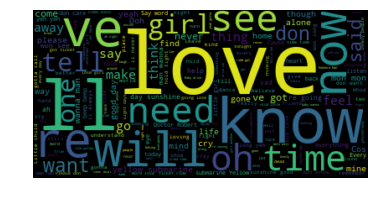

In [98]:
# Create and generate a word cloud image for most popular words in early Beatles's lyrics:
wordcloud_e = WordCloud().generate(corpus_e_str)

# Display the generated image:
plt.imshow(wordcloud_e, interpolation='bilinear')
plt.axis("off")
plt.show()

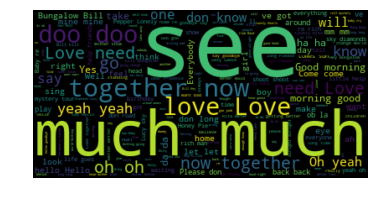

In [99]:
# Create and generate a word cloud image for most popular words in late Beatles's lyrics:
wordcloud_la = WordCloud().generate(corpus_la_str)

# Display the generated image:
plt.imshow(wordcloud_la, interpolation='bilinear')
plt.axis("off")
plt.show()

In [97]:
#Define our predictors and target
X = df_b['lyrics']
y = df_b['period']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [99]:
## Instantiate the vectorizer 

tf = TfidfVectorizer(stop_words='english')

## let's transform our dataframe and get it ready for the classification process 
X_tr = tf.fit_transform(X_train)

df_b_X_tr_text = pd.DataFrame(X_tr.toarray(), columns=tf.get_feature_names())


In [100]:
df_b_X_tr_text

,12,31,50,aaaaah,aaaaahhhhh,aaaah,aahh,able,accidents,aches,...,years,yee,yeh,yellow,yes,yesterday,young,younger,zap,zapped
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.095395,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.0,0.029651,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.160710,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.085000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.073006,0.000000,0.000000,0.000000,0.000000


In [101]:
#We try fitting different models mostly using their default parameters.
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(df_b_X_tr_text,y_train)

C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
# Now we need to transform the test subset and get it in the same form as train subset.
X_te = tf.transform(X_test)

df_b_X_te_text = pd.DataFrame(X_te.toarray(), columns=tf.get_feature_names())



In [103]:
print(f"mean accuracy score: {rfc.score(df_b_X_te_text, y_test)}")

mean accuracy score: 0.625


In [104]:
lgr = LogisticRegression(penalty='l2', C=1.0)
lgr.fit(df_b_X_tr_text, y_train)

C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [106]:
print(f"mean accuracy score: {lgr.score(df_b_X_te_text, y_test)}")

mean accuracy score: 0.625


In [107]:
adac = AdaBoostClassifier(n_estimators=3)
adac.fit(df_b_X_tr_text, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=3, random_state=None)

In [109]:
print(f"mean accuracy score: {adac.score(df_b_X_te_text, y_test)}")

mean accuracy score: 0.675


In [110]:
neighc = KNeighborsClassifier()
neighc.fit(df_b_X_tr_text, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [112]:
print(f"mean accuracy score: {neighc.score(df_b_X_te_text, y_test)}")

mean accuracy score: 0.5


In [113]:
svc=SVC(probability=True)
svc.fit(df_b_X_tr_text,y_train)

C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [115]:
print(f"mean accuracy score: {svc.score(df_b_X_te_text, y_test)}")

mean accuracy score: 0.475


In [116]:
#For the best 3 models we create Gridsearch and try to fine tune the parameters for each of it.
models = ['Logistic Regression', 'AdaBoost', 'Random Forest']

clfs = [LogisticRegression(), 
        AdaBoostClassifier(),
        RandomForestClassifier(n_jobs=-1)]
        
        
params = {models[0]: {'C': [1.0, 5.0, 10.0, 20.0, 30.0, 50.0]},
          models[1]: {'n_estimators': [5, 10, 50, 100]},
         models[2]:  {'n_estimators': [5, 10, 50, 100]}}
        

In [117]:
for name, estimator in zip(models, clfs):
    print(name)
    clf=GridSearchCV(estimator, params[name], scoring='accuracy', refit=True, n_jobs=-1, cv=5)
    clf.fit(df_b_X_tr_text, y_train)
    print ('best params:' + str(clf.best_params_))
    print ('best scores:' + str(clf.best_score_))
    y_pred = clf.predict(df_b_X_te_text)
    acc = accuracy_score(y_test, y_pred)
    
    print ('Accuracy: {:,.4%}'.format(acc))
    print (classification_report(y_test, y_pred, digits=4))
    

Logistic Regression


C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


best params:{'C': 50.0}
best scores:0.7310924369747899
Accuracy: 62.5000%
              precision    recall  f1-score   support

           0     0.6250    0.7143    0.6667        21
           1     0.6250    0.5263    0.5714        19

   micro avg     0.6250    0.6250    0.6250        40
   macro avg     0.6250    0.6203    0.6190        40
weighted avg     0.6250    0.6250    0.6214        40

AdaBoost


C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best params:{'n_estimators': 100}
best scores:0.773109243697479
Accuracy: 65.0000%
              precision    recall  f1-score   support

           0     0.6667    0.6667    0.6667        21
           1     0.6316    0.6316    0.6316        19

   micro avg     0.6500    0.6500    0.6500        40
   macro avg     0.6491    0.6491    0.6491        40
weighted avg     0.6500    0.6500    0.6500        40

Random Forest


C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best params:{'n_estimators': 50}
best scores:0.7983193277310925
Accuracy: 82.5000%
              precision    recall  f1-score   support

           0     0.8500    0.8095    0.8293        21
           1     0.8000    0.8421    0.8205        19

   micro avg     0.8250    0.8250    0.8250        40
   macro avg     0.8250    0.8258    0.8249        40
weighted avg     0.8262    0.8250    0.8251        40



In [118]:
X_test

98       Billy Shears    What would you think if I sa...
183      My baby says she s travelling on the one aft...
152      If you re listening to this song  You may th...
75       Michelle  ma belle  These are words that go ...
115      I am he  As you are he  As you are me  And w...
41       This happened once before  When I came to yo...
175      Her Majesty s a pretty nice girl But she doe...
71       When I call you up  Your line s engaged  I h...
119      How does it feel to be  One of the beautiful...
169      Mean Mister Mustard sleeps in the park Shave...
31       Before this dance is through  I think I ll l...
80       It s been a long time  Now I m coming back h...
26       You know you made me cry  I see no use in wo...
85       When I wake up early in the morning  Lift my...
36       I ve got every reason on earth to be mad  Co...
42       I m a loser  I m a loser  And I m not what I...
148      Cry baby cry  Make your mother sigh  She s o...
122      Dear Prudence  won t y

In [119]:
#So with Random Forest we got the best score.
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [120]:
confusion_matrix(y_test, y_pred)

array([[17,  4],
       [ 3, 16]], dtype=int64)

##### Using Random Forest we were able to correctly determine the lyrics period in 33 songs out of 40.

In [166]:
np.random.seed(42)

In [167]:
from keras import models
from keras.models import Sequential
from keras import layers

input_dim=df_b_X_tr_text.shape[1]

model = Sequential()
model.add(layers.Dense(500, activation='relu', input_dim=input_dim))
model.add(layers.Dense(80, activation='relu'))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#num_classes=2

In [168]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [169]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [170]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [171]:
history = model.fit(df_b_X_tr_text,
                    y_train,
                    epochs=30,
                    batch_size=1,
                    validation_data=(df_b_X_te_text, y_test))
results = model.evaluate(df_b_X_te_text, y_test)

Train on 119 samples, validate on 40 samples
Epoch 1/30
119/119 [==============================] - 2s 20ms/step - loss: 0.6795 - binary_accuracy: 0.5630 - val_loss: 0.6677 - val_binary_accuracy: 0.6000
Epoch 2/30
119/119 [==============================] - 2s 14ms/step - loss: 0.4260 - binary_accuracy: 0.9328 - val_loss: 0.5933 - val_binary_accuracy: 0.6500
Epoch 3/30
119/119 [==============================] - 2s 14ms/step - loss: 0.1213 - binary_accuracy: 0.9664 - val_loss: 0.7094 - val_binary_accuracy: 0.6500
Epoch 4/30
119/119 [==============================] - 2s 15ms/step - loss: 0.0507 - binary_accuracy: 0.9832 - val_loss: 0.9852 - val_binary_accuracy: 0.6500
Epoch 5/30
119/119 [==============================] - 2s 14ms/step - loss: 0.0317 - binary_accuracy: 0.9832 - val_loss: 1.2676 - val_binary_accuracy: 0.7000
Epoch 6/30
119/119 [==============================] - 2s 14ms/step - loss: 0.0049 - binary_accuracy: 1.0000 - val_loss: 1.4685 - val_binary_accuracy: 0.6750
Epoch 7/30
11

In [151]:
results

[2.7869686126708983, 0.65]

In [152]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

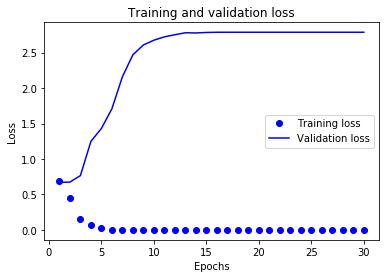

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

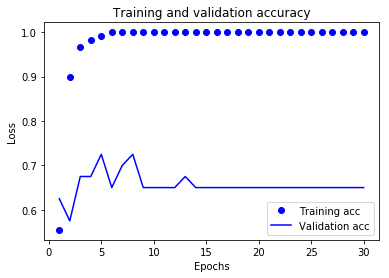

In [154]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [155]:
from keras import regularizers
from keras import losses
from keras import metrics
model_2 = Sequential()

input_dim=df_b_X_tr_text.shape[1]

#model.add(layers.Dense(600, activation='relu', input_dim=input_dim))
model_2.add(layers.Dense(600, input_dim=input_dim, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))
#model_2.add(layers.Dense(200, input_dim=input_dim, activation='relu',
 #               kernel_regularizer=regularizers.l2(0.01)))
#model_2.add(layers.Dense(50, input_dim=input_dim, activation='relu',
  #              kernel_regularizer=regularizers.l2(0.01)))
model_2.add(layers.Dense(1, activation='sigmoid',
                kernel_regularizer=regularizers.l2(0.01)))

model_2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])


model_2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history_2 = model_2.fit(df_b_X_tr_text, y_train, validation_data=(df_b_X_te_text, y_test), 
              epochs=30, batch_size=1)

Train on 119 samples, validate on 40 samples
Epoch 1/30
119/119 [==============================] - 3s 27ms/step - loss: 1.4844 - binary_accuracy: 0.5126 - val_loss: 0.7074 - val_binary_accuracy: 0.6000
Epoch 2/30
119/119 [==============================] - 3s 23ms/step - loss: 0.6965 - binary_accuracy: 0.6471 - val_loss: 0.7164 - val_binary_accuracy: 0.5500
Epoch 3/30
119/119 [==============================] - 3s 22ms/step - loss: 0.6975 - binary_accuracy: 0.6555 - val_loss: 0.7044 - val_binary_accuracy: 0.6000
Epoch 4/30
119/119 [==============================] - 3s 22ms/step - loss: 0.6951 - binary_accuracy: 0.6807 - val_loss: 0.7136 - val_binary_accuracy: 0.6500
Epoch 5/30
119/119 [==============================] - 3s 22ms/step - loss: 0.6924 - binary_accuracy: 0.7143 - val_loss: 0.7210 - val_binary_accuracy: 0.5500
Epoch 6/30
119/119 [==============================] - 3s 22ms/step - loss: 0.6822 - binary_accuracy: 0.7311 - val_loss: 0.7087 - val_binary_accuracy: 0.6000
Epoch 7/30
11

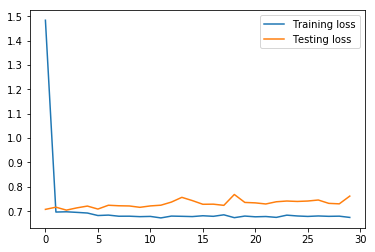

In [156]:
train_loss_2 = history_2.history['loss']
test_loss_2 = history_2.history['val_loss']
plt.plot(train_loss_2, label='Training loss')
plt.plot(test_loss_2, label='Testing loss')
plt.legend()

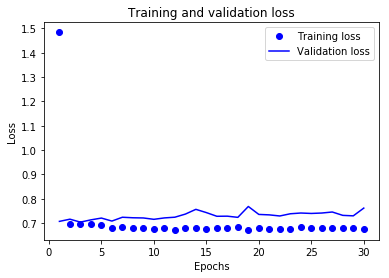

In [157]:
acc_2 = history_2.history['binary_accuracy']
val_acc_2 = history_2.history['val_binary_accuracy']
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_2, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss_2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [158]:
history_2.history['acc'][-1], history_2.history['val_acc'][-1]

KeyError: 'acc'

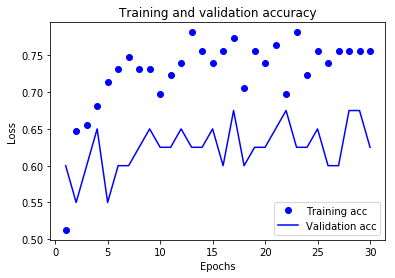

In [159]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_2, 'bo', label='Training acc')
plt.plot(epochs, val_acc_2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [160]:
from keras.layers import Dropout

model_3 = Sequential()

input_dim=df_b_X_tr_text.shape[1]

#model.add(layers.Dense(600, activation='relu', input_dim=input_dim))
model_3.add(layers.Dense(600, input_dim=input_dim, activation='relu'))
model_3.add(Dropout(0.8)) # refers to nodes in the first hidden layer
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
model_3.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history_3 = model_3.fit(df_b_X_tr_text, y_train, validation_data=(df_b_X_te_text, y_test), 
              epochs=30, batch_size=1)

Train on 119 samples, validate on 40 samples
Epoch 1/30
119/119 [==============================] - 2s 21ms/step - loss: 0.6920 - binary_accuracy: 0.4958 - val_loss: 0.6847 - val_binary_accuracy: 0.6000
Epoch 2/30
119/119 [==============================] - 2s 16ms/step - loss: 0.6662 - binary_accuracy: 0.7395 - val_loss: 0.6754 - val_binary_accuracy: 0.6250
Epoch 3/30
119/119 [==============================] - 2s 16ms/step - loss: 0.6362 - binary_accuracy: 0.7899 - val_loss: 0.6622 - val_binary_accuracy: 0.7250
Epoch 4/30
119/119 [==============================] - 2s 16ms/step - loss: 0.5988 - binary_accuracy: 0.8403 - val_loss: 0.6496 - val_binary_accuracy: 0.7000
Epoch 5/30
119/119 [==============================] - 2s 17ms/step - loss: 0.5582 - binary_accuracy: 0.8487 - val_loss: 0.6336 - val_binary_accuracy: 0.6750
Epoch 6/30
119/119 [==============================] - 2s 17ms/step - loss: 0.5020 - binary_accuracy: 0.8908 - val_loss: 0.6168 - val_binary_accuracy: 0.6750
Epoch 7/30
11

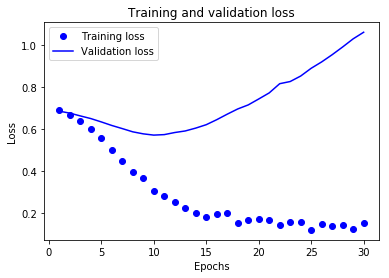

In [161]:
acc_3 = history_3.history['binary_accuracy']
val_acc_3 = history_3.history['val_binary_accuracy']
loss_3 = history_3.history['loss']
val_loss_3 = history_3.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_3, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss_3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

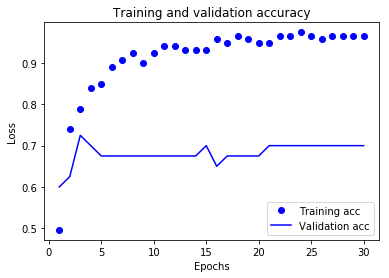

In [162]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_3, 'bo', label='Training acc')
plt.plot(epochs, val_acc_3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [163]:
from keras.callbacks import EarlyStopping

model_4 = Sequential()

input_dim=df_b_X_tr_text.shape[1]


model_4.add(layers.Dense(200, input_dim=input_dim, activation='relu'))
model_4.add(layers.Dense(1, activation='sigmoid'))

model_4.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
model_4.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=1, mode='auto')

callbacks_list = [early_stop]

history_4 = model_4.fit(df_b_X_tr_text, y_train, validation_data=(df_b_X_te_text, y_test), 
                        epochs=30, batch_size=None,
                        callbacks = callbacks_list)

Train on 119 samples, validate on 40 samples
Epoch 1/30
119/119 [==============================] - 0s 3ms/step - loss: 0.6924 - binary_accuracy: 0.5294 - val_loss: 0.6822 - val_binary_accuracy: 0.7500
Epoch 2/30
119/119 [==============================] - 0s 210us/step - loss: 0.6440 - binary_accuracy: 0.9328 - val_loss: 0.6749 - val_binary_accuracy: 0.7750
Epoch 3/30
119/119 [==============================] - 0s 268us/step - loss: 0.6054 - binary_accuracy: 0.9748 - val_loss: 0.6662 - val_binary_accuracy: 0.8250
Epoch 4/30
119/119 [==============================] - 0s 260us/step - loss: 0.5665 - binary_accuracy: 0.9916 - val_loss: 0.6561 - val_binary_accuracy: 0.7250
Epoch 5/30
119/119 [==============================] - 0s 251us/step - loss: 0.5266 - binary_accuracy: 0.9916 - val_loss: 0.6462 - val_binary_accuracy: 0.7250
Epoch 6/30
119/119 [==============================] - 0s 243us/step - loss: 0.4861 - binary_accuracy: 0.9916 - val_loss: 0.6360 - val_binary_accuracy: 0.7250
Epoch 7/3

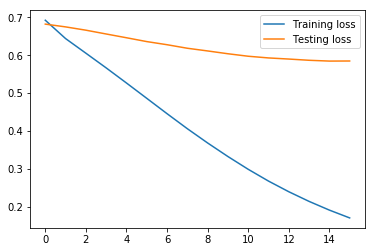

In [164]:
train_loss_4 = history_4.history['loss']
test_loss_4 = history_4.history['val_loss']
plt.plot(train_loss_4, label='Training loss')
plt.plot(test_loss_4, label='Testing loss')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (1,) and (16,)

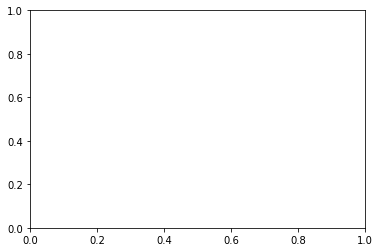

In [165]:
acc_4 = history_4.history['binary_accuracy']
val_acc_4 = history_4.history['val_binary_accuracy']
loss_4 = history_4.history['loss']
val_loss_4 = history_4.history['val_loss']

epochs = 12

# "bo" is for "blue dot"
plt.plot(epochs, loss_4, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss_4, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_4, 'bo', label='Training acc')
plt.plot(epochs, val_acc_4, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

##### So we were not able to beat Random Forest performance with Keras Neural Network.